In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
fp_counts = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_counts.tsv'
fp_deseq = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_deseq.tsv'
df_counts = pd.read_csv(fp_counts, sep='\t')
df_deseq = pd.read_csv(fp_deseq, sep='\t')
assert (len(df_counts) == len(df_deseq)) and len(df_counts) > 0
print(len(df_counts), len(df_deseq))

42245 42245


In [3]:
th_padj = 0.1
th_log2FoldChange = 1.5
df_jump = pd.DataFrame()
for stage in itertools.islice(config['stages'], None):
    df_jump['lcap_jump_%(stage)s_fwd' % locals()] = (\
        (df_deseq['lcap_%(stage)s_fwd_padj' % locals()] <= th_padj) &\
        (df_deseq['lcap_%(stage)s_fwd_log2FoldChange' % locals()] >= th_log2FoldChange)
    )
    df_jump['lcap_jump_%(stage)s_rev' % locals()] = (\
        (df_deseq['lcap_%(stage)s_rev_padj' % locals()] <= th_padj) &\
        (df_deseq['lcap_%(stage)s_rev_log2FoldChange' % locals()] >= th_log2FoldChange)
    )

In [4]:
# Fwd strand jump pass
pd.concat([df_jump['lcap_jump_%s_fwd' % (stage,)].value_counts() for stage in config['stages']], axis=1)

,lcap_jump_wt_emb_fwd,lcap_jump_wt_l1_fwd,lcap_jump_wt_l2_fwd,lcap_jump_wt_l3_fwd,lcap_jump_wt_l4_fwd,lcap_jump_wt_ya_fwd,lcap_jump_glp1_d1_fwd,lcap_jump_glp1_d2_fwd,lcap_jump_glp1_d6_fwd,lcap_jump_glp1_d9_fwd,lcap_jump_glp1_d13_fwd
False,38653,38481,37716,38554,38325,38514,39246,39608,39193,39372,39203
True,3592,3764,4529,3691,3920,3731,2999,2637,3052,2873,3042


In [5]:
# Rev strand jump pass
pd.concat([df_jump['lcap_jump_%s_rev' % (stage,)].value_counts() for stage in config['stages']], axis=1)

,lcap_jump_wt_emb_rev,lcap_jump_wt_l1_rev,lcap_jump_wt_l2_rev,lcap_jump_wt_l3_rev,lcap_jump_wt_l4_rev,lcap_jump_wt_ya_rev,lcap_jump_glp1_d1_rev,lcap_jump_glp1_d2_rev,lcap_jump_glp1_d6_rev,lcap_jump_glp1_d9_rev,lcap_jump_glp1_d13_rev
False,38641,38540,37841,38429,38437,38532,39326,39615,39165,39359,39231
True,3604,3705,4404,3816,3808,3713,2919,2630,3080,2886,3014


In [6]:
fp_startbp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_counts_incr.tsv'
df_startbp = pd.read_csv(fp_startbp, sep='\t')

df_incr = pd.DataFrame()
for stage in itertools.islice(config['stages'], None):
    df_incr['lcap_incr_%(stage)s_fwd' % locals()] = (\
        (df_startbp['lcap_%(stage)s_rep1_fwd_rcount' % locals()] == 0) &\
        (df_startbp['lcap_%(stage)s_rep2_fwd_rcount' % locals()] == 0) &\
        (df_startbp['lcap_%(stage)s_rep1_fwd_fcount' % locals()] >= 1) &\
        (df_startbp['lcap_%(stage)s_rep2_fwd_fcount' % locals()] >= 1) &\
        (df_startbp['lcap_%(stage)s_rep1_fwd_fcount' % locals()] + df_startbp['lcap_%(stage)s_rep2_fwd_fcount' % locals()] >= 3)
    )
    df_incr['lcap_incr_%(stage)s_rev' % locals()] = (\
        (df_startbp['lcap_%(stage)s_rep1_rev_fcount' % locals()] == 0) &\
        (df_startbp['lcap_%(stage)s_rep2_rev_fcount' % locals()] == 0) &\
        (df_startbp['lcap_%(stage)s_rep1_rev_rcount' % locals()] >= 1) &\
        (df_startbp['lcap_%(stage)s_rep2_rev_rcount' % locals()] >= 1) &\
        (df_startbp['lcap_%(stage)s_rep1_rev_rcount' % locals()] + df_startbp['lcap_%(stage)s_rep2_rev_rcount' % locals()] >= 3)
    )

In [7]:
# Fwd strand incr pass
pd.concat([df_incr['lcap_incr_%s_fwd' % (stage,)].value_counts() for stage in config['stages']], axis=1)

,lcap_incr_wt_emb_fwd,lcap_incr_wt_l1_fwd,lcap_incr_wt_l2_fwd,lcap_incr_wt_l3_fwd,lcap_incr_wt_l4_fwd,lcap_incr_wt_ya_fwd,lcap_incr_glp1_d1_fwd,lcap_incr_glp1_d2_fwd,lcap_incr_glp1_d6_fwd,lcap_incr_glp1_d9_fwd,lcap_incr_glp1_d13_fwd
False,38973,38986,38631,38541,38793,38429,38598,38762,38638,38396,38270
True,3272,3259,3614,3704,3452,3816,3647,3483,3607,3849,3975


In [8]:
# Rev strand incr pass
pd.concat([df_incr['lcap_incr_%s_rev' % (stage,)].value_counts() for stage in config['stages']], axis=1)

,lcap_incr_wt_emb_rev,lcap_incr_wt_l1_rev,lcap_incr_wt_l2_rev,lcap_incr_wt_l3_rev,lcap_incr_wt_l4_rev,lcap_incr_wt_ya_rev,lcap_incr_glp1_d1_rev,lcap_incr_glp1_d2_rev,lcap_incr_glp1_d6_rev,lcap_incr_glp1_d9_rev,lcap_incr_glp1_d13_rev
False,39080,38981,38498,38433,38795,38508,38666,38835,38606,38383,38279
True,3165,3264,3747,3812,3450,3737,3579,3410,3639,3862,3966


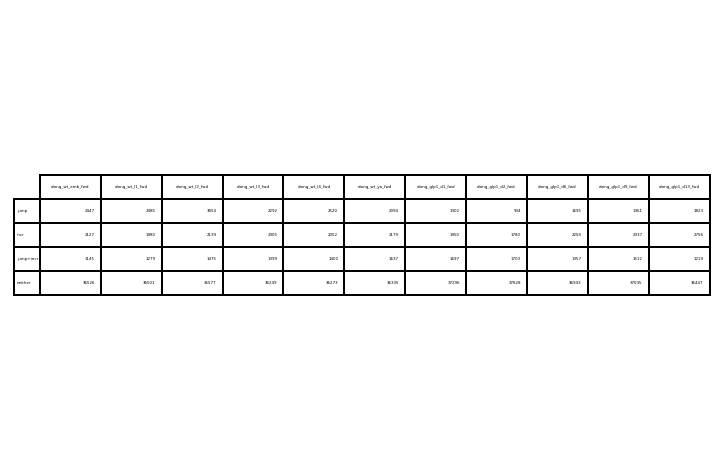

In [9]:
#for stage in itertools.islice(config['lcap_geo_by_stage'], None):
#    df_incr['lcap_incr_%(stage)s_fwd' % locals()] = (\
#        (df_startbp['lcap_%(stage)s_rep1_fwd_rcount' % locals()] == 0) &\
#        (df_startbp['lcap_%(stage)s_rep2_fwd_rcount' % locals()] == 0) &\
#        (df_startbp['lcap_%(stage)s_rep1_fwd_fcount' % locals()] >= 1) &\
#        (df_startbp['lcap_%(stage)s_rep2_fwd_fcount' % locals()] >= 1) &\
#        (df_startbp['lcap_%(stage)s_rep1_fwd_fcount' % locals()] + df_startbp['lcap_%(stage)s_rep2_fwd_fcount' % locals()] >= 3)
#    )
#    df_incr['lcap_incr_%(stage)s_rev' % locals()] = (\
#        (df_startbp['lcap_%(stage)s_rep1_rev_fcount' % locals()] == 0) &\
#        (df_startbp['lcap_%(stage)s_rep2_rev_fcount' % locals()] == 0) &\
#        (df_startbp['lcap_%(stage)s_rep1_rev_rcount' % locals()] >= 1) &\
#        (df_startbp['lcap_%(stage)s_rep2_rev_rcount' % locals()] >= 1) &\
#        (df_startbp['lcap_%(stage)s_rep1_rev_rcount' % locals()] + df_startbp['lcap_%(stage)s_rep2_rev_rcount' % locals()] >= 3)
#    )

def summary_(jump, incr):
    if jump and incr:
        return 'jump+incr'
    elif jump:
        return 'jump'
    elif incr:
        return 'incr'
    else:
        return 'neither'

#for stage in itertools.islice(config['lcap_geo_by_stage'], None):
df_summary = pd.DataFrame()
for stage_ in itertools.islice(config['stages'], None):
    df_summary['elong_%s_fwd' % (stage_,)] = list(map(summary_, df_jump['lcap_jump_%s_fwd' % (stage_,)], df_incr['lcap_incr_%s_fwd' % (stage_,)]))

l_ = ['jump', 'incr', 'jump+incr', 'neither']
df_ = pd.concat([df_summary['elong_%s_fwd' % (stage_,)].value_counts() for stage_ in config['stages']], axis=1).loc[l_]

plt.subplot(111, frame_on=False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
pd.plotting.table(data=df_, ax=plt.gca(), loc='center left')
plt.savefig('annot/FigA_mapping/lcap_elongation_fwd.pdf', bbox_inches='tight')

In [10]:
pd.concat([df_jump, df_incr], axis=1).to_csv('annot/S2_regulatory_annotation/_lcap_jump/lcap_summary.tsv', sep='\t', index=False)

In [11]:
# summary results
def itemRgb_(is_jump, is_incr):
    if is_jump == True:
        return RED
    elif is_incr:
        return YELLOW
    else:
        return BLUE

strand = 'fwd'
write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_tests_wt_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_wt']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_wt']]
    ],
    strand = '+',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1)
    ),
)

write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_tests_glp1_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_glp1']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_glp1']]
    ],
    strand = '+',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1)
    ),
)

strand = 'rev'
write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_tests_wt_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_wt']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_wt']]
    ],
    strand = '-',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1)
    ),
)

write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_tests_glp1_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_glp1']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_glp1']]
    ],
    strand = '-',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1)
    ),
)

In [12]:
# incr results
def itemRgb_(is_jump, is_incr):
    if is_incr:
        return PURPLE
    else:
        return BLUE

strand = 'fwd'
write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_incr_wt_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_wt']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_wt']]
    ],
    strand = '+',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1)
    ),
)

write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_incr_glp1_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_glp1']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_glp1']]
    ],
    strand = '+',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1)
    ),
)

strand = 'rev'
write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_incr_wt_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_wt']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_wt']]
    ],
    strand = '-',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_wt']]].any(axis=1)
    ),
)

write_gffbed(
    fp = 'annot/S2_regulatory_annotation/_lcap_jump/lcap_incr_glp1_%(strand)s.bed' % locals(),
    chrom = df_counts['chrom'],
    start = df_counts['start'],
    end = df_counts['end'],
    attr = df_deseq[
        ['lcap_%s_%s_padj' % (stage, strand) for stage in config['stages_glp1']] +\
        ['lcap_%s_%s_log2FoldChange' % (stage, strand) for stage in config['stages_glp1']]
    ],
    strand = '-',
    itemRgb = map(itemRgb_,
        df_jump[['lcap_jump_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1),
        df_incr[['lcap_incr_%s_%s' % (stage, strand) for stage in config['stages_glp1']]].any(axis=1)
    ),
)

In [13]:
#df_ = pd.concat([df_counts, df_jump, df_incr, df_deseq], axis=1)
#df_['lcap_jump_wt_fwd'] = df_[['lcap_jump_%s_fwd' % (stage,) for stage in config['stages_wt']]].any(axis=1)
#df_['lcap_jump_wt_rev'] = df_[['lcap_jump_%s_rev' % (stage,) for stage in config['stages_wt']]].any(axis=1)